In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./data/ul-pfe-ns.csv')

In [3]:
# df.columns

In [4]:
# df.head()

In [5]:
df.shape

(1972, 80)

In [6]:
# df.info()

In [7]:
X = df.drop('throughput',axis=1)

In [8]:
X.shape

(1972, 79)

In [9]:
y = df['throughput']

In [10]:
y.shape

(1972,)

In [11]:
# Split the data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Instantiate model
from sklearn.linear_model import PoissonRegressor
model = PoissonRegressor()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
rmse = np.sqrt(mse)

In [12]:
model

PoissonRegressor()

In [13]:
mae

4.542677042108039

In [14]:
mse

31.798869251692146

In [15]:
rmse

5.6390486122831165

In [16]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['PR'])
err_df

,PR
MAE,4.542677
MSE,31.798869
RMSE,5.639049


In [17]:
err_df.to_csv('./baseline-test-err/poi-test-err.csv')

In [18]:
y_pred_df = pd.DataFrame(y_pred, columns=['throughput_pred'])
y_pred_df.describe().drop('count')
# no negative predictions

,throughput_pred
mean,18.432452
std,6.756615
min,6.453409
25%,13.297340
50%,17.149236
75%,22.870785
max,39.998117


<AxesSubplot:ylabel='Count'>

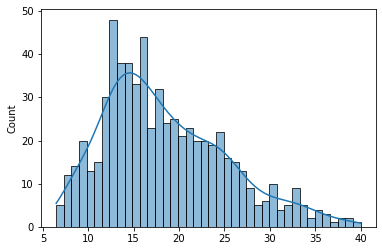

In [19]:
sns.histplot(y_pred,bins=40,kde=True)
# the distribution better reflects the true distribution of the data set

In [20]:
# y.describe().drop(['count'])

In [21]:
res = y_test - y_pred
res.describe().drop('count')

mean    -0.266635
std      5.637073
min    -15.975489
25%     -4.102592
50%      0.063183
75%      3.889723
max     15.168491
Name: throughput, dtype: float64

<AxesSubplot:xlabel='throughput', ylabel='Count'>

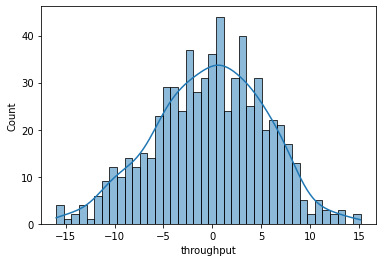

In [22]:
sns.histplot(data=res, kde=True,bins=40)

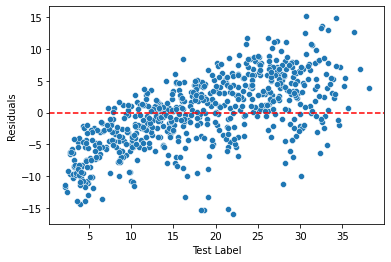

In [23]:
ax = sns.scatterplot(x=y_test, y=res)
ax.set(ylabel='Residuals', xlabel='Test Label')
plt.axhline(y=0,color='red',linestyle='--')

# there should be no clear pattern / curve in the plot
# we see a positive correlation between Test Label and Residuals -> later models should avoid this pattern

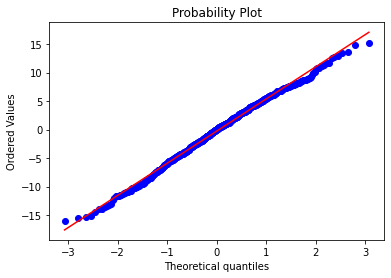

In [24]:
import scipy as sp

fig, ax = plt.subplots()
sp.stats.probplot(res,plot=ax);

In [25]:
# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)

X_poisson = scaler.transform(X)

poisson_model = PoissonRegressor()
poisson_model.fit(X_poisson,y)

PoissonRegressor()

In [26]:
model.coef_

array([ 8.06053266e-03,  1.05308341e-02,  3.15348868e-03, -1.68046470e-02,
        8.93611125e-03,  1.99443103e-02, -2.16359826e-02,  1.74765417e-01,
        2.48190916e-02,  3.78117588e-02,  9.66694771e-03, -4.57763584e-02,
        2.62397086e-01, -1.11021585e-02,  8.16629996e-02, -1.21088644e-02,
        1.77634386e-02,  5.09319984e-03, -4.58907540e-03, -9.83078126e-03,
       -2.29079672e-02,  2.12528584e-03, -1.53264789e-03, -1.29045503e-02,
       -9.58813697e-03,  1.08159293e-02, -1.97658948e-03,  1.09109298e-02,
        4.46988444e-03, -2.34293199e-02, -1.93728585e-03, -2.70713756e-03,
        1.64147264e-02,  1.88168471e-03,  2.84052722e-02, -3.04990551e-02,
       -3.44078729e-02, -1.61981639e-02,  1.13336848e-02,  4.20018396e-03,
        1.69202790e-03, -9.94961063e-03, -5.82956725e-03, -7.30724679e-03,
       -7.89333198e-05,  1.18615444e-02, -8.59406976e-03, -4.84763146e-02,
       -4.78949698e-03, -3.56325495e-02,  1.19906438e-02,  1.55894007e-02,
       -2.56335946e-02, -

In [27]:
# coef_df = pd.DataFrame(data=model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [28]:
poisson_model.coef_

array([ 0.00961324,  0.00529071, -0.00545185, -0.02255334,  0.00105367,
        0.01997898, -0.02062518,  0.15640568,  0.04153219,  0.03518498,
        0.0121734 , -0.0471521 ,  0.27631241, -0.01845938,  0.08295397,
       -0.01593222,  0.01709353,  0.00424671, -0.00208802, -0.00992856,
       -0.01552384, -0.00134841, -0.01166473, -0.00611845,  0.00249131,
        0.0068871 ,  0.00321377,  0.00945836,  0.00577806, -0.01996561,
        0.00426665,  0.00886607,  0.01364429,  0.00116953,  0.02569433,
       -0.02996992, -0.03325149, -0.02663574,  0.01979897,  0.00599033,
        0.00167237, -0.00175101, -0.00532096, -0.01245243, -0.00133798,
        0.01393975, -0.01283805, -0.05126685, -0.00161193, -0.0449608 ,
        0.01927094,  0.01302352, -0.02518486, -0.00974108, -0.00038748,
        0.00367702, -0.00877956,  0.03130937, -0.00094601,  0.01923887,
       -0.0010236 ,  0.01701961, -0.02005901,  0.00313889, -0.00906674,
       -0.00867101,  0.01571693,  0.0409536 ,  0.0110682 , -0.05

In [29]:
# coef_df = pd.DataFrame(data=poisson_model.coef_,index=X.columns,columns=['beta'])
# coef_df

In [30]:
delta_df = pd.DataFrame(data=poisson_model.coef_ - model.coef_,index=X.columns,columns=['delta_beta'])
delta_df

,delta_beta
distance,0.001553
lat,-0.005240
lon,-0.008605
alt,-0.005749
speed,-0.007882
...,...
region_urban,-0.005945
weekday_Monday,-0.003151
weekday_Thursday,-0.005724
weekday_Tuesday,0.003360


In [31]:
pd.set_option('display.max_columns',None)
delta_df.sort_values('delta_beta').sort_values('delta_beta').transpose()

,rsrp,ci_27771906,ci_26385409,ci_28371201,lon,ci_29401601,weekday_Wednesday,speed,ci_29913346,rtt,region_urban,alt,weekday_Thursday,ci_29563904,lat,ci_28365058,ci_30422273,ci_33837570,ci_28368384,ci_29568768,region_suburban,ci_26796291,hour,ci_26385408,weekday_Monday,ci_28368386,ci_27770888,ci_27771140,sinr,ci_29391104,region_highway,ci_31281409,ci_27256324,ta,ci_28367105,ci_29568769,ci_26378498,ci_27771139,ci_26378497,ci_26378755,ci_27771909,acc,ci_33527561,ci_29391105,ci_28365057,ci_27771904,ci_33527554,dir,ci_27771905,ci_30492930,txPower,ci_27256325,distance,ci_29398276,ci_27771908,ci_28367106,ci_26378754,cqi,ci_28371200,weekday_Tuesday,ci_27299332,ci_29391106,ci_29913344,ci_33519104,ci_27029251,ci_31263232,ci_29913345,ci_33527552,ci_27770883,ci_26385410,ci_28371202,ci_26379013,ci_28365056,ci_27771907,ci_33527559,ci_27770885,ci_26796290,payload,rsrq
delta_beta,-0.01836,-0.010438,-0.010132,-0.009328,-0.008605,-0.008383,-0.008248,-0.007882,-0.007599,-0.007357,-0.005945,-0.005749,-0.005724,-0.005596,-0.00524,-0.005145,-0.005122,-0.004359,-0.004244,-0.004119,-0.004073,-0.003929,-0.003823,-0.003474,-0.003151,-0.002791,-0.00277,-0.002711,-0.002627,-0.002566,-0.002237,-0.001783,-0.001453,-0.001376,-0.001259,-0.001104,-0.000846,-0.000712,-0.00067,-0.000098,-0.00002,0.000035,0.000207,0.000449,0.000509,0.000529,0.000806,0.001011,0.001156,0.00127,0.001291,0.001308,0.001553,0.001748,0.00179,0.002078,0.002501,0.002506,0.003178,0.00336,0.003464,0.003693,0.004435,0.005102,0.00519,0.005563,0.006012,0.006101,0.006204,0.006786,0.00728,0.007384,0.008199,0.008465,0.010669,0.011573,0.012079,0.013915,0.016713


<AxesSubplot:ylabel='Count'>

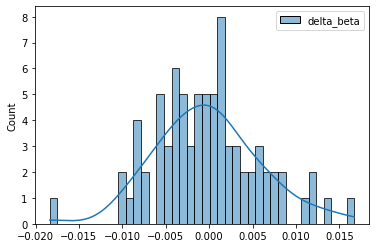

In [32]:
sns.histplot(data=delta_df,bins=40,kde=True)

In [33]:
y_pred_poisson = poisson_model.predict(X_poisson)

<AxesSubplot:ylabel='Count'>

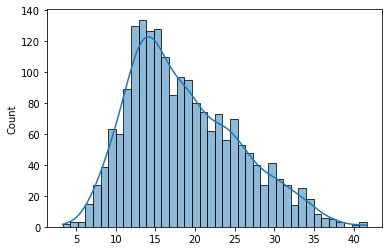

In [34]:
sns.histplot(y_pred_poisson,bins=40,kde=True)

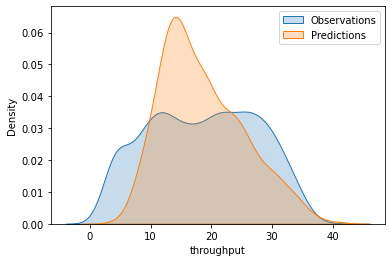

In [35]:
fig,ax = plt.subplots()

sns.kdeplot(y, ax=ax, shade=True, label='Observations')
sns.kdeplot(y_pred_poisson, ax=ax,shade=True,label='Predictions')

ax.legend(loc='best')

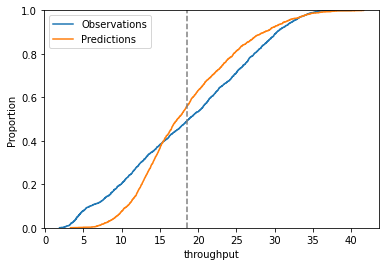

In [36]:
fig,ax = plt.subplots()

sns.ecdfplot(y, ax=ax, label='Observations')
sns.ecdfplot(y_pred_poisson, ax=ax,label='Predictions')
plt.axvline(x=y.mean(),color='grey',linestyle='--')

ax.legend(loc='best')

In [37]:
mae = mean_absolute_error(y,y_pred_poisson)
mse = mean_squared_error(y,y_pred_poisson)
rmse = np.sqrt(mse)

In [38]:
err_df = pd.DataFrame(data=[mae, mse, rmse],index=['MAE','MSE','RMSE'],columns=['PR'])
err_df

,PR
MAE,4.400952
MSE,29.553145
RMSE,5.436280


In [39]:
# err_df.to_csv('./model-err/poi-model-err.csv')

In [40]:
from joblib import dump, load
dump(poisson_model, './baseline-models/poi-model.joblib')

['./baseline-models/poi-model.joblib']

DONE!